# Sample Simulation


## Setup

In [188]:
# Install the RocketPy package using pip
!pip install rocketpy

'''
# Download NACA0012-radians.csv file using curl from RocketPy GitHub repository
!curl -o NACA0012-radians.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/NACA0012-radians.csv

# Download Cesaroni_M1670.eng file using curl from RocketPy GitHub repository
!curl -o Cesaroni_M1670.eng https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/motors/Cesaroni_M1670.eng

# Download powerOffDragCurve.csv file using curl from RocketPy GitHub repository
!curl -o powerOffDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/powerOffDragCurve.csv

# Download powerOnDragCurve.csv file using curl from RocketPy GitHub repository
!curl -o powerOnDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/powerOnDragCurve.csv
'''

'\n# Download NACA0012-radians.csv file using curl from RocketPy GitHub repository\n!curl -o NACA0012-radians.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/NACA0012-radians.csv\n\n# Download Cesaroni_M1670.eng file using curl from RocketPy GitHub repository\n!curl -o Cesaroni_M1670.eng https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/motors/Cesaroni_M1670.eng\n\n# Download powerOffDragCurve.csv file using curl from RocketPy GitHub repository\n!curl -o powerOffDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/powerOffDragCurve.csv\n\n# Download powerOnDragCurve.csv file using curl from RocketPy GitHub repository\n!curl -o powerOnDragCurve.csv https://raw.githubusercontent.com/RocketPy-Team/RocketPy/master/data/calisto/powerOnDragCurve.csv\n'

In [189]:
# Import necessary classes from the RocketPy library

# Environment: Represents the atmospheric and environmental conditions during flight
# SolidMotor: Represents a solid rocket motor with specified characteristics
# Rocket: Represents a rocket with specified design parameters and components
# Flight: Represents a flight simulation of a rocket in a given environment and with specified motor and rocket configurations

from rocketpy import Environment, SolidMotor, Rocket, Flight


In [190]:
# Used for tidying up the outputted data - not critical for operations

# Configure the InlineBackend to display SVG figures
%config InlineBackend.figure_formats = ['svg']

# Ensure that matplotlib plots are displayed inline in the Jupyter Notebook
%matplotlib inline


## Setting Up a Simulation


### Creating an Environment


In [191]:
# Create an Environment object representing the atmospheric and environmental conditions during flight
env = Environment(latitude=55.43753666449806, longitude=-5.687982477918211, elevation=13)


In [192]:
import datetime

# Get the date of tomorrow
# Can be any day, just change the 'days' variable equal to the unmber of days between today and the day you want
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

# Set the date and time in the Environment object, with the hour given in UTC time
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))


In [193]:
# Set the atmospheric model type to "Forecast" and specify the file for the Global Forecast System (GFS)
env.set_atmospheric_model(type="Forecast", file="GFS")



Gravity Details

Acceleration of gravity at surface level:    9.8153 m/s²
Acceleration of gravity at  79.979 km (ASL): 9.5734 m/s²


Launch Site Details

Launch Date: 2024-04-10 12:00:00 UTC
Launch Site Latitude: 55.43754°
Launch Site Longitude: -5.68798°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 329952.06 W    6146767.65 N
Launch Site UTM zone: 30U
Launch Site Surface Elevation: 38.2 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.979 km
Forecast Time Period: From  2024-04-09 12:00:00  to  2024-04-25 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 11.41 m/s
Surface Wind Direction: 176.39°
Surface Wind Heading: 356.39°
Surface Pressure: 1000.00 hPa
Surface Temperature: 281.93 K
Surface Air Density: 1.236 kg/m³
Surface Speed of Sound: 336.60 m/s


Earth Model Details

Earth Radi

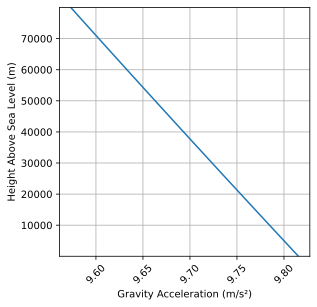



Atmospheric Model Plots


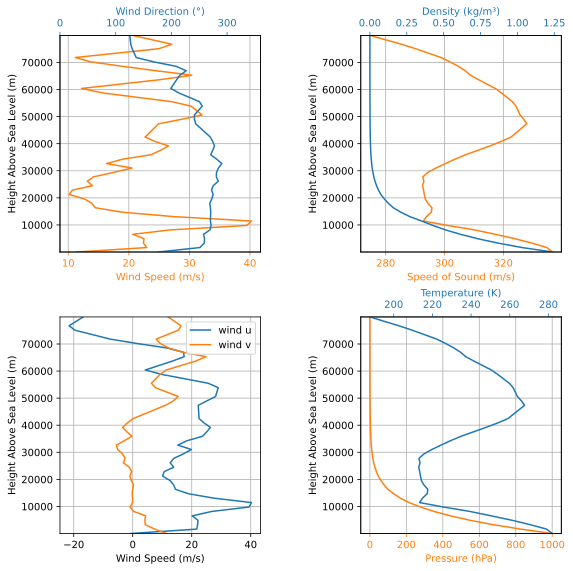

In [194]:
# Retrieve all information about the Environment object
env.all_info()


### Creating a Motor




In [195]:
# Define a SolidMotor object with specific parameters
PRO75L645 = SolidMotor(
    # Correct
    thrust_source="Cesaroni_3419L645-P.eng", # Specify the .eng file containing thrust data
    # Correct
    dry_mass=1.607, # Dry mass of the motor in kilograms
    # Assumption - Sean Reynolds Number
    dry_inertia=(0.039, 0.039, 0.0015), # Dry mass moments of inertia in kg*m^2
    # Assumption
    nozzle_radius = 37.5 / 1000, # Radius of the nozzle exit in meters
    # Correct
    grain_number=3, # Number of propellant grains
    # Assumption - Sean Bourke
    grain_density=1815, # Density of the propellant in kg/m^3
    # Assumption
    grain_outer_radius = 37.5 / 1000, # Outer radius of the propellant grains in meters (37.5)
    # Assumption
    grain_initial_inner_radius=29 / 1000, # Initial inner radius of the propellant grains in meters
    # Assumption - prolly important
    grain_initial_height=157 / 1000, # Initial height of the propellant grains in meters
    # Assumption - prolly important
    grain_separation=5 / 1000, # Separation between propellant grains in meters
    #Assumption - prolly important
    grains_center_of_mass_position=0.343, # Position of the center of mass of the propellant grains
    # Assumption
    center_of_dry_mass_position=0.231, # Position of the center of mass of the dry motor
    # Correct
    nozzle_position = 0.0, # Position of the nozzle relative to the combustion chamber
    # Correct
    burn_time=5.3, # Burn time of the motor in seconds

    throat_radius=12.5 / 1000, # Radius of the motor throat in meters
    # Known
    coordinate_system_orientation="nozzle_to_combustion_chamber" # Orientation of the coordinate system -> EXTREMLY IMPORTANT
)


Nozzle Details
Nozzle Radius: 0.0375 m
Nozzle Throat Radius: 0.0125 m

Grain Details
Number of Grains: 3
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.0375 m
Grain Inner Radius: 0.029 m
Grain Height: 0.157 m
Grain Volume: 0.000 m3
Grain Mass: 0.506 kg

Motor Details
Total Burning Time: 5.3 s
Total Propellant Mass: 1.518 kg
Average Propellant Exhaust Velocity: 2260.216 m/s
Average Thrust: 647.384 N
Maximum Thrust: 764.97 N at 2.043 s after ignition.
Total Impulse: 3431.136 Ns



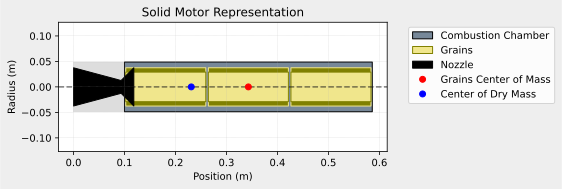

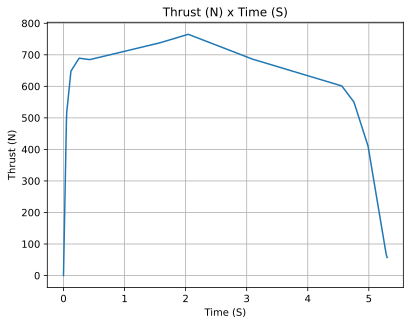

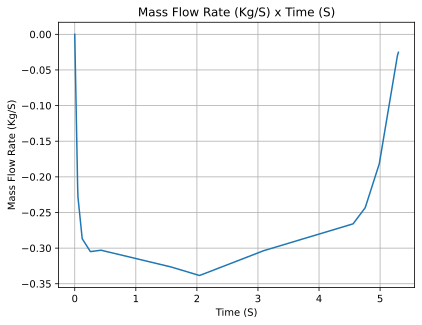

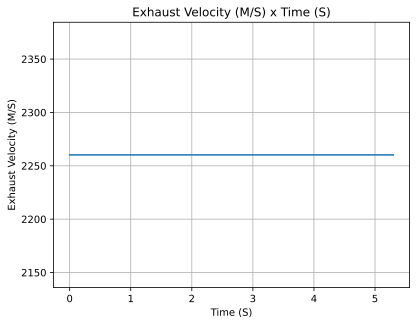

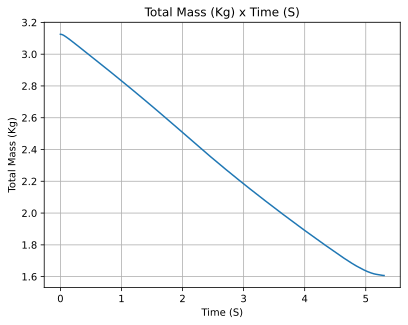

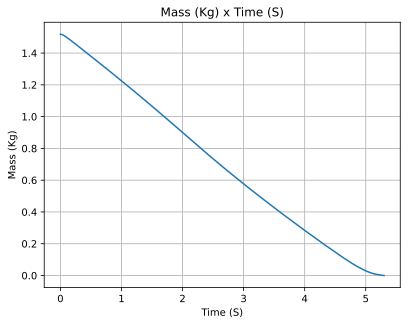

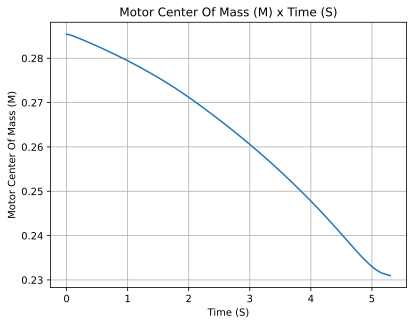

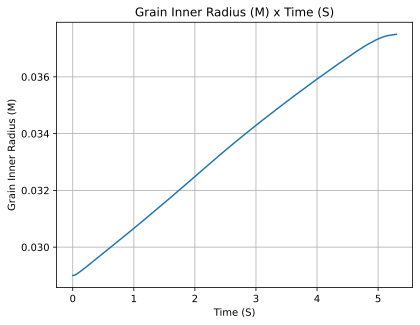

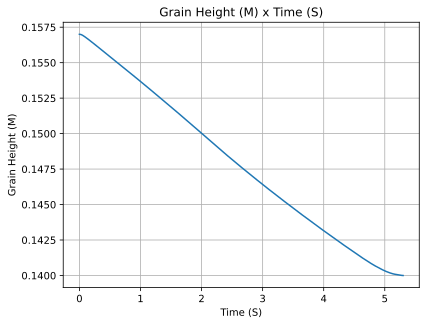

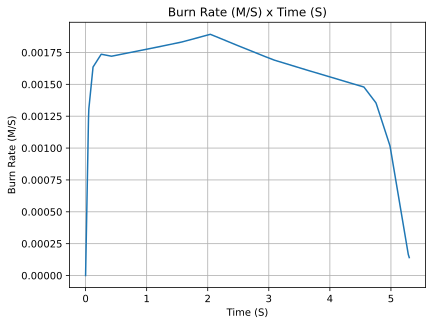

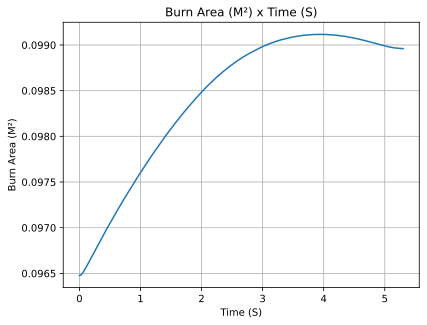

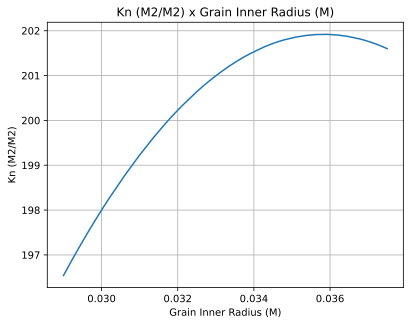

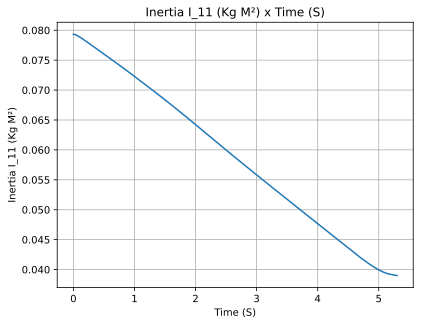

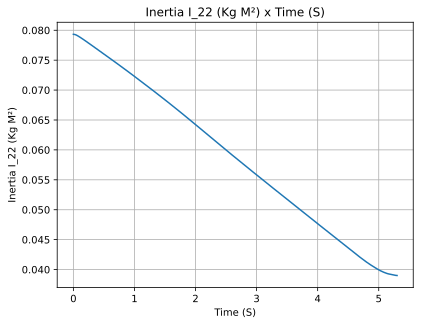

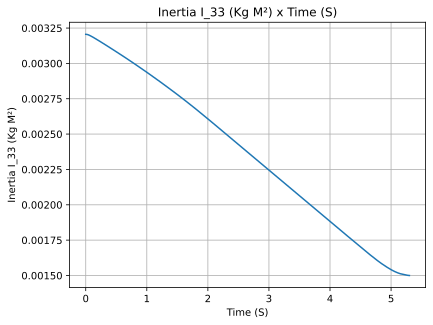

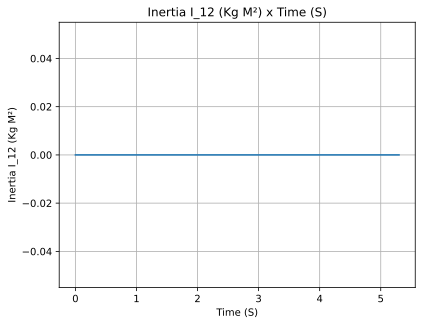

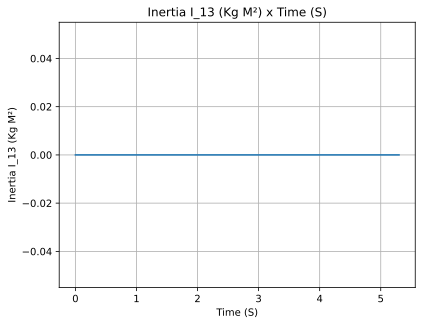

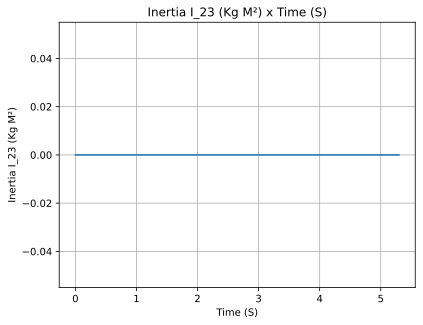

In [196]:
# Retrieve all information about the SolidMotor object
PRO75L645.all_info()


### Creating a Rocket


In [197]:
# Define a Rocket object with specific parameters
rocket = Rocket(
    radius=106 / 2000, # Radius of the rocket body in meters
    mass=5.109, # Total mass of the rocket in kilogr...ams
    # These need to be checked
    inertia=(3.8 , 3.8, 0.01), # Moments of inertia of the rocket in kg*m^2

    power_off_drag = "DragOffCSV.csv", # .csv file containing power-off drag curve data

    power_on_drag = "DragOnCSV.csv", # .csv file containing power-on drag curve data

    center_of_mass_without_motor=86.7 / 100, # Position of the center of mass of the rocket without the motor

    coordinate_system_orientation="tail_to_nose" # Orientation of the coordinate system -> EXTREMLY IMPORTANT -> MUST be relative to the coordinate system defined in the motor
)

# Set the rail buttons for the rocket
rail_buttons = rocket.set_rail_buttons(
    upper_button_position=0.618, # Position of the upper rail button relative to the rocket nose
    lower_button_position=0.230, # Position of the lower rail button relative to the rocket nose
    angular_position=45, # Angular position of the rail buttons in degrees
)


In [198]:
# Add the motor object to the rocket object at a specific position
# Said position is EXTREMLY IMPORTANT
rocket.add_motor(PRO75L645, position=0)


### Adding Aerodynamic Surfaces


In [199]:
# Add a nose cone to the rocket object with specific parameters
nose_cone = rocket.add_nose(length=0.484, kind="vonKarman", position=1.77)

# Add trapezoidal fins to the rocket with specific parameters
fin_set = rocket.add_trapezoidal_fins(
    n=3, # Number of fins
    root_chord=0.25, # Root chord length of the fins in meters
    tip_chord=0.098, # Tip chord length of the fins in meters
    span=0.15, # Span of the fins in meters
    position=0.32, # Position of the fins relative to the rocket nose
    cant_angle=0, # Cant angle of the fins in radians
    airfoil=("AirfoilDegreesCSV.csv", "degrees"), # Airfoil profile of the fins -> .csv file and declare your unit of measurment (radians OR degrees)
)

# Add a tail to the rocket object with specific parameters
tail = rocket.add_tail(
    top_radius = 106 / 2000, # Top radius of the tail in meters
    bottom_radius=0.04, # Bottom radius of the tail in meters
    length=0.07, # Length of the tail in meters
    position=0.07 # Position of the tail relative to the rocket nose
)



Inertia Details

Rocket Mass: 5.109 kg (without motor)
Rocket Dry Mass: 6.716 kg (with unloaded motor)
Rocket Loaded Mass: 8.234 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 4.333 kg*m2
Rocket Inertia (with unloaded motor) 22: 4.333 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.011 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.053 m
Rocket Frontal Area: 0.008825 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.152 m
Rocket Center of Dry Mass - Nozzle Exit: 0.715 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.372 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.069 m


Aerodynamics Lift Coefficient Derivatives

Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 14.804/rad
Tail Lift Coefficient Derivative: -0.861/ra

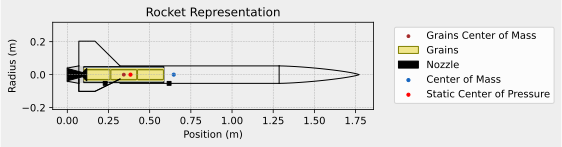


Mass Plots
----------------------------------------


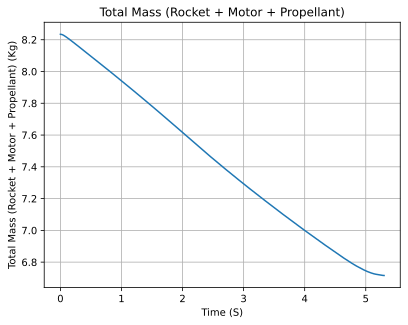

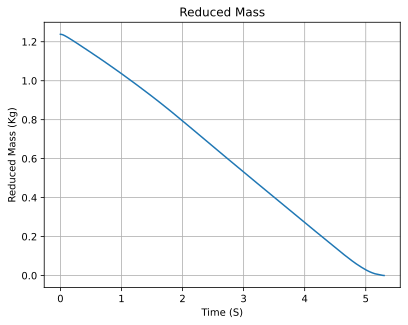


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


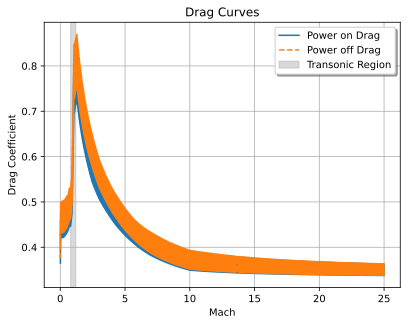


Stability Plots
--------------------


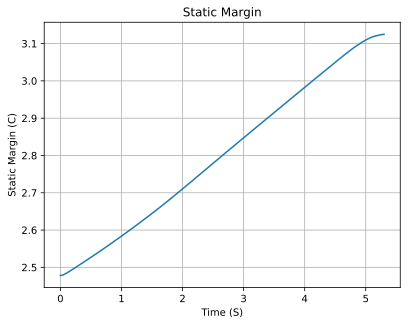

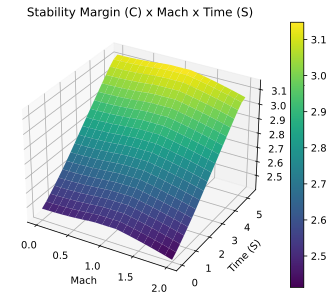


Thrust-to-Weight Plot
----------------------------------------


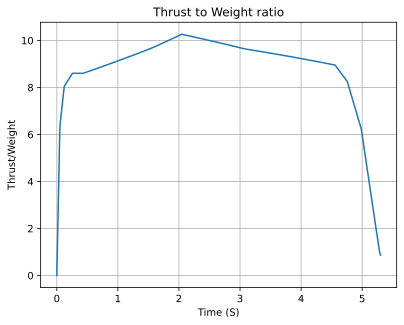

In [200]:
# Retrieve all information about the Rocket object
rocket.all_info()


### Adding Parachutes


In [201]:
# Add a main parachute to the rocket with specific parameters
Main = rocket.add_parachute(
    "Main", # Name of the parachute
    cd_s = 1.0, # Drag coefficient of the parachute in m^2
    trigger = 200, # Trigger for parachute deployment can be EITHER an altitude in meters OR an event
    sampling_rate = 105, # Sampling rate for parachute simulation
    lag = 1.5, # Lag time for parachute deployment in seconds
    noise = (0, 8.3, 0.5), # Noise parameters for parachute simulation
)

# Add a drogue parachute to the rocket with specific parameters
Drogue = rocket.add_parachute(
    "Drogue", # Name of the parachute
    cd_s = 0.2, # Drag coefficient of the parachute in m^2
    trigger = "apogee", # Trigger for parachute deployment can be EITHER an altitude in meters OR an event
    sampling_rate = 105, # Sampling rate for parachute simulation
    lag = 1.5, # Lag time for parachute deployment in seconds
    noise = (0, 8.3, 0.5), # Noise parameters for parachute simulation
)


## Simulating a Flight


In [202]:
# Create a Flight object named test_flight with specific parameters
test_flight = Flight(
    rocket=rocket, # Rocket object representing the rocket to be simulated
    environment=env, # Environment object representing the atmospheric and environmental conditions
    rail_length=4, # Length of the launch rail in meters
    inclination=70, # Inclination angle of the launch rail in degrees
    heading = 170 # Heading angle of the launch rail in degrees
)

## Analyzing the Results



Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 38.22 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.086 | e1: -0.015 | e2: 0.173 | e3: -0.981
Euler Angles - Spin φ : 0.00° | Nutation θ: -20.00° | Precession ψ: -170.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -11.34 m/s
Lateral Surface Wind Speed: 1.27 m/s


Launch Rail

Launch Rail Length: 4  m
Launch Rail Inclination: 70.00°
Launch Rail Heading: 170.00°


Rail Departure State

Rail Departure Time: 0.349 s
Rail Departure Velocity: 22.234 m/s
Rail Departure Stability Margin: 2.511 c
Rail Departure Angle of Attack: 22.336°
Rail Departure Thrust-Weight Ratio: 8.599
Rail Departure Reynolds Number: 2.102e+05


Burn out State

Burn out time: 5.300 s
Altitude at burn out: 771.171 m (AGL)
Rocket velocity at burn out: 311.699 m/s
Freestream velocity at burn out: 323.049 m/s
Mach Number at burn out: 0.965
Kinetic energy at burn

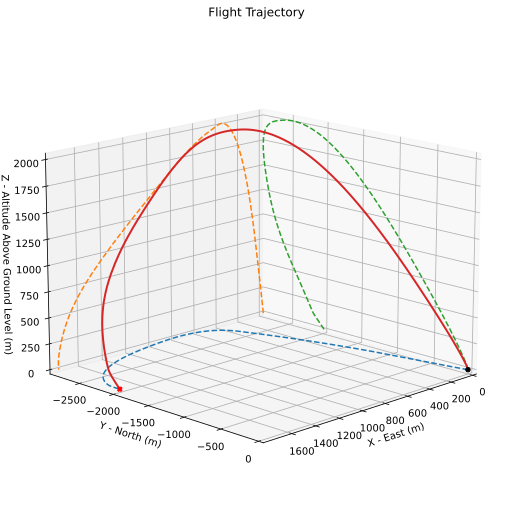



Trajectory Kinematic Plots



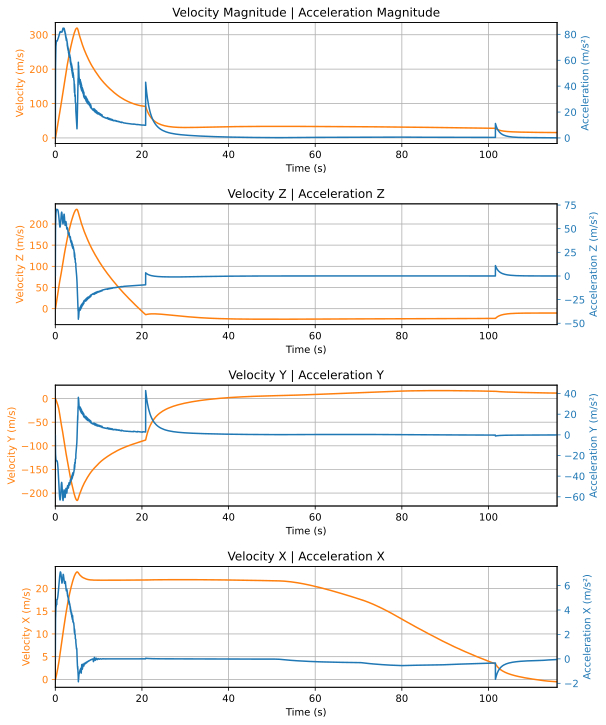



Angular Position Plots



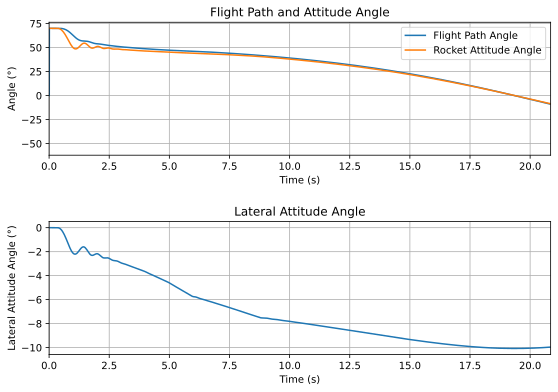



Path, Attitude and Lateral Attitude Angle plots



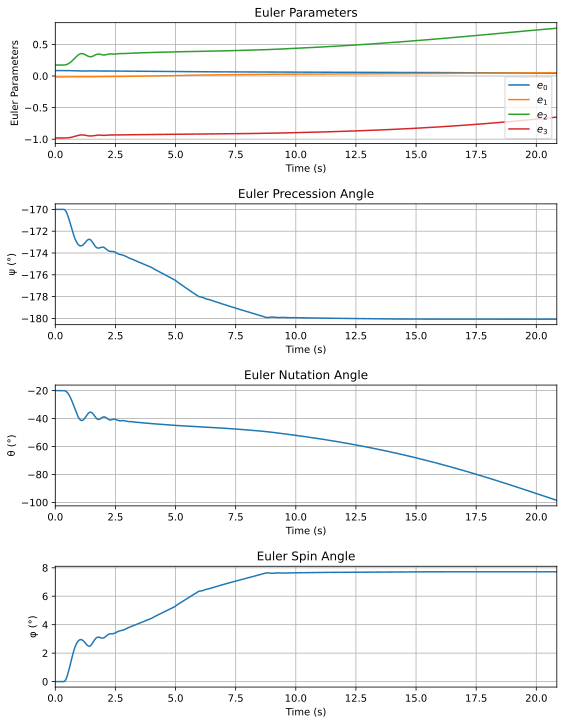



Trajectory Angular Velocity and Acceleration Plots



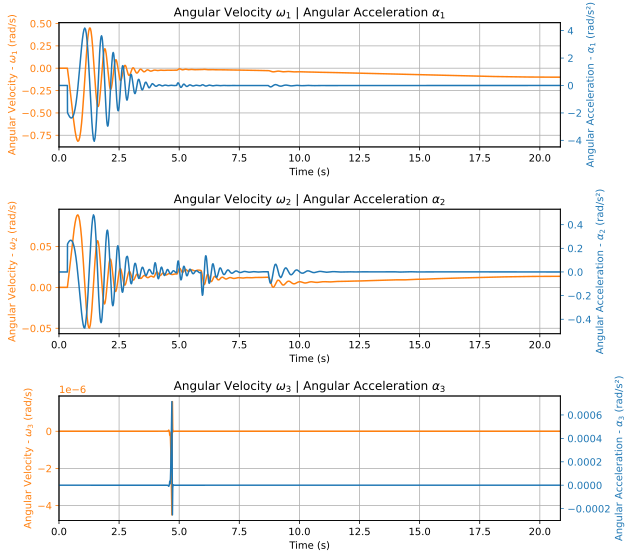



Aerodynamic Forces Plots



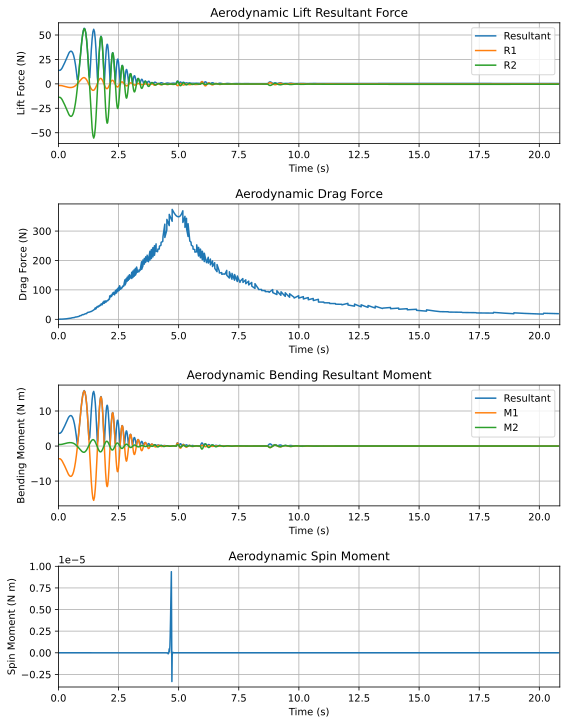



Rail Buttons Forces Plots



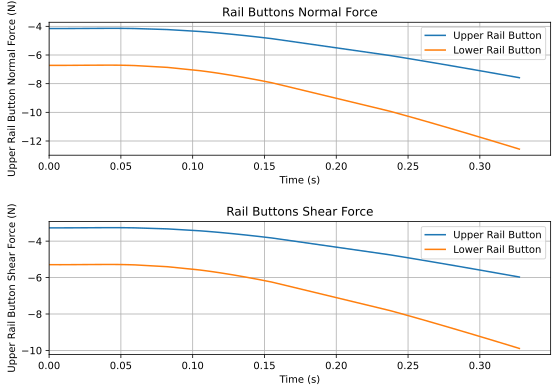



Trajectory Energy Plots



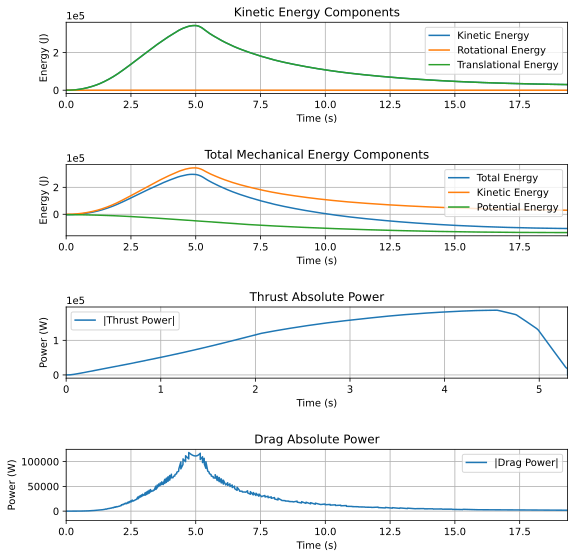



Trajectory Fluid Mechanics Plots



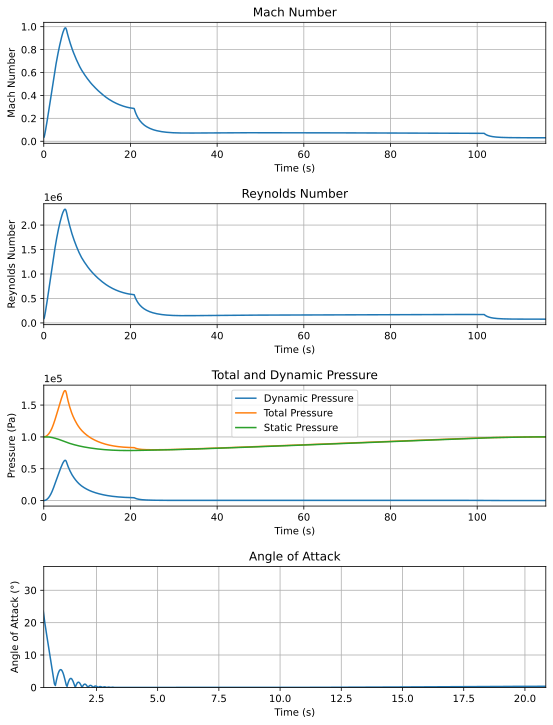



Trajectory Stability and Control Plots



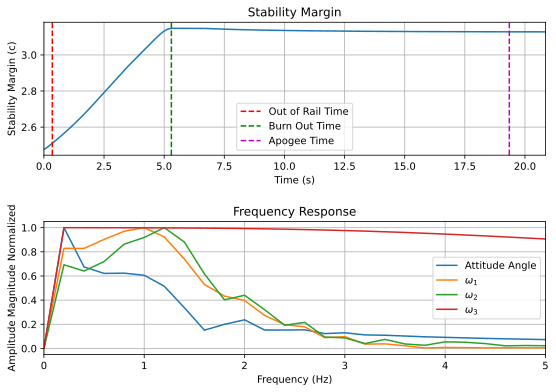



Rocket and Parachute Pressure Plots



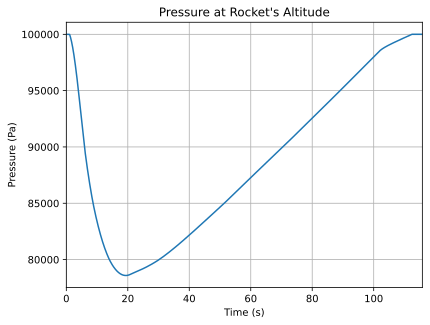


Parachute:  Main


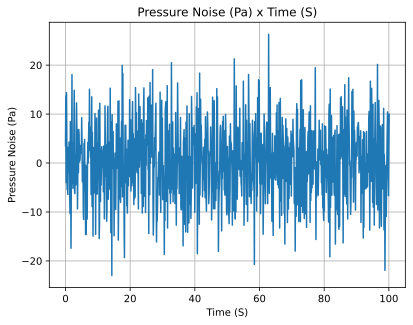

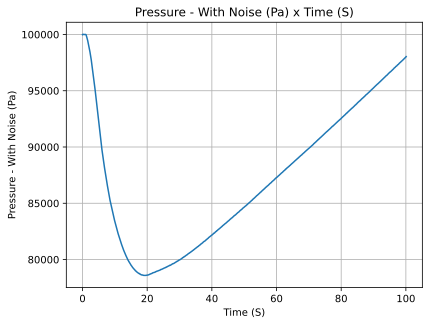

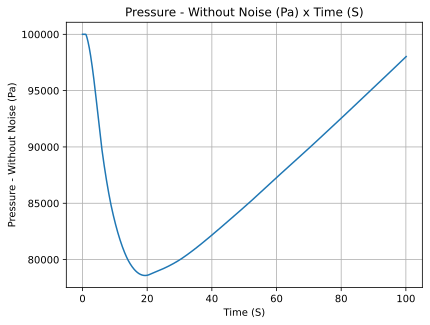


Parachute:  Drogue


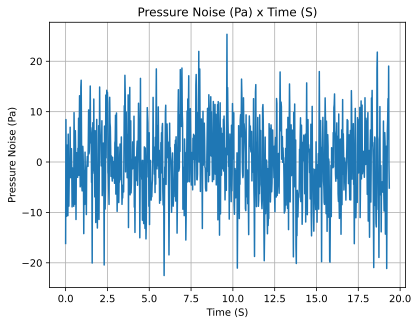

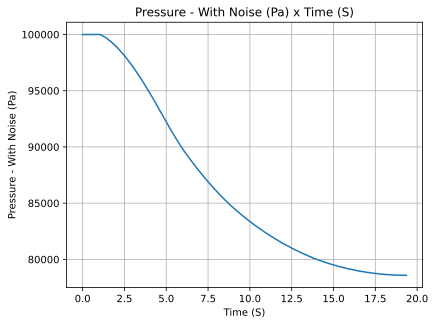

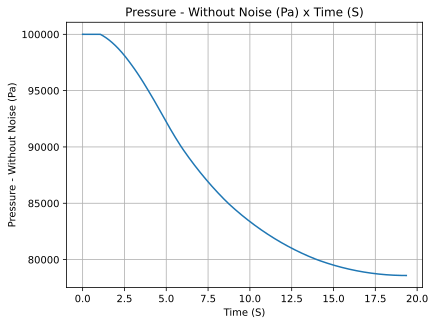

In [203]:
# Retrieve all information about the test_flight Flight object
test_flight.all_info()

In [204]:
from google.colab import files

# Export the trajectory of the test_flight to a KML file
test_flight.export_kml(
    file_name="Trajectory.kml", # Specify the file name
    extrude=True, # Enable extrusion for 3D visualization
    altitude_mode="relative_to_ground", # Specify the altitude mode
)

# Download the KML file for use in Google Earth
files.download('Trajectory.kml')


File  Trajectory.kml  saved with success!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>